In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import torch

### Problem Statement:

Predicting the optimal crop that could be grown in a particular location based on the
soil composition, rainfall, temperature and return of investment is essential for any
farmer of the modern world. This could not only save farmers from spending extra
money on fertilizers but also avoid the dangerous practice of growing the same crops
on the same patch of land repeatedly, which depletes the solid from its natural
resources.

#### given dataset links:

1) https://www.kaggle.com/datasets/thammuio/all-agriculture-related-datasets-for-india

2) https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities

3) https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

4) https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities

5) https://www.kaggle.com/datasets/rajanand/rainfall-in-india



In [3]:
df1=pd.read_csv("Crop_recommendation.csv")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


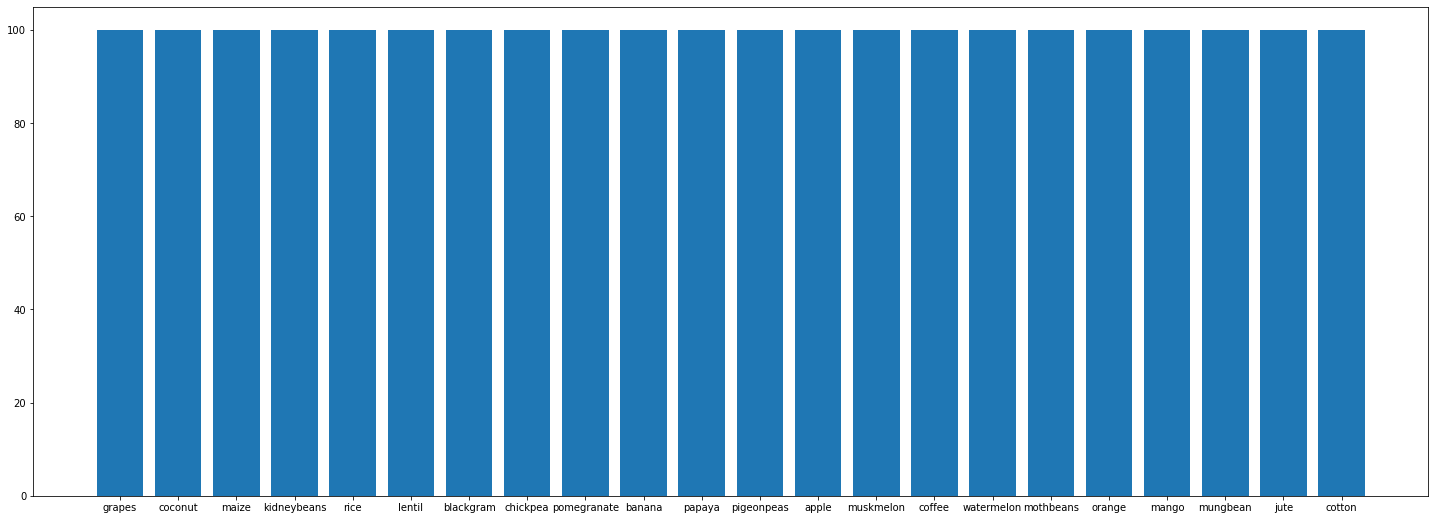

In [21]:
plt.figure(figsize=(25,9))
plt.bar(list(set(df1.label)),[list(df1['label']).count(i) for i in set(df1.label)])
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
X=df1.drop(inplace=False,columns=['label'])
y=df1['label']
y=le.fit_transform(y)


In [29]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [32]:
from xgboost import XGBClassifier
from interpret.glassbox import ExplainableBoostingClassifier

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
xgb=XGBClassifier()
ebm=ExplainableBoostingClassifier()

In [35]:
xgb.fit(X_train,y_train)
ebm.fit(X_train,y_train)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sutha\anaconda3\lib\site-packages\interpret\glassbox\ebm\ebm.py:568: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.
  warn("Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.")


ExplainableBoostingClassifier()

In [46]:
y_pred=xgb.predict(X_test)

C:\Users\sutha\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
